In [6]:
import scanpy as sc
import pandas as pd


df= pd.read_csv('DEG_GSE291852_raw_counts.txt', delimiter='\t',index_col=0)
# Read the file and transpose it for adata
adata = sc.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 8 × 22244

In [7]:
adata.obs, adata.var, adata.X # metadata, gene names, and data matrix

(Empty DataFrame
 Columns: []
 Index: [CON1, CON2, CON3, CON4, NPT1, NPT2, NPT3, NPT4],
 Empty DataFrame
 Columns: []
 Index: [Zglp1, Vmn2r65, Gm10024, Oog3, Ldlrap1, Mdn1, Ifi208, Wfdc17, Mfap1b, Tmsb15b2, Cstdc5, Gm15114, A930017K11Rik, Vmn1r223, Umad1, Gm3373, Dnajc3, Niban3, Rsph3b, Rnaset2a, Fam174b, Spink13, Apela, Gm11837, Ramacl, Prcd, Gm10710, Myocos, Cep85l, Gm10406, Cstdc6, Or10h1b, Or10h1, Btnl1, Isg15, Pira12, Defa30, Vmn2r121, Sirpb1c, Mup9, Gm1979, Gm1988, Rps12-ps18, Gm1993, Ubl5c, LOC100038995, Gm2003, Mup10, LOC100039010, Gm20793, Mup-ps12, Mup11, LOC100039029, Gm2012, Gm20795, Eif1ad3, Gm10471, Eif1ad4, Mup12, Gm16404, Gm2026, Gm2030, Gm2036, Gm2042, Mup13, Eif1ad5, Mup14, Gm14525, Gm14295, Ccdc152, Mup15, Mup16, Mup17, Gm2102, Ctxnd1, Gm10058, Gm12693, Gm2128, Gm2137, Pramel51, H2ab1, Gm10147, Gm16500, Gm10096, Gm2237, Gm2244, Gm10487, Gm11810, Vmn1r186, Vmn1r187, Gm10029, Gm10486, Tgif2lx2, Gm20806, Gm14819, Gm20807, Tcf24, Gm20809, Msmp, Gm10634, ...]
 
 [22244 ro

In [8]:
mt_mask = (
    adata.var_names.str.startswith('MT-') | 
    adata.var_names.str.startswith('Mt-') | 
    adata.var_names.str.startswith('mt-')
)
# Look for mitochondrial genes, that start with Mt, MT or mt

adata.var['Mt'] = mt_mask
# Add a column in var fort mitochondrial genes

adata.var

,Mt
Zglp1,False
Vmn2r65,False
Gm10024,False
Oog3,False
Ldlrap1,False
...,...
Arfip1,False
Prmt6,False
Ifi44,False
Tiparp,False


In [9]:
conditions = ['Control','Control','Control','Control', 'Treated','Treated','Treated','Treated']
# Define the conditions for each condition in the experiment, u can examine in adata.obs
adata.obs['condition'] = conditions


In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)
# Normalize data to max 10000

sc.pp.log1p(adata)
# Log transform the data

adata

AnnData object with n_obs × n_vars = 8 × 22244
    obs: 'condition'
    var: 'Mt'
    uns: 'log1p'

(4, 22244)

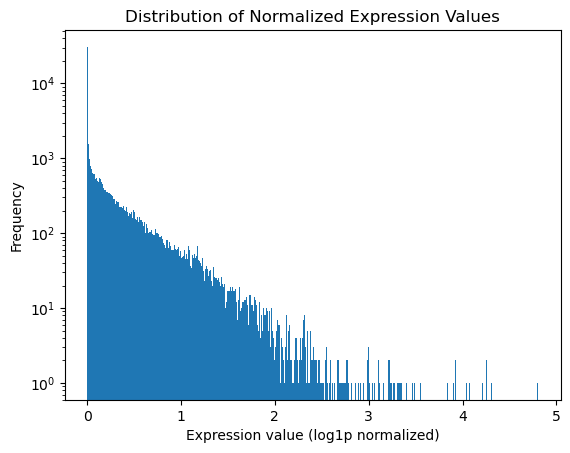

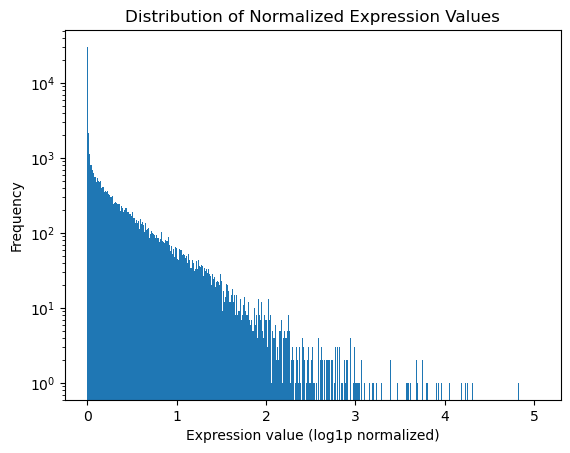

In [ ]:
import matplotlib.pyplot as plt

flattened_data = adata.X[0:4].flatten()
# Flatten the data to plot a histogram, for [0:4] for control
# Plot a histogram (log scale)

plt.hist(flattened_data, bins=1000, log=True)
plt.xlabel("Expression value (log1p normalized) for control")
plt.ylabel("Frequency")
plt.title("Distribution of Normalized Expression Values")
plt.show()
# Visuzlize the data how gene have expression values, eg. Most gene has low expression value. 

flattened_data = adata.X[4:8].flatten()
# Flatten the data to plot a histogram, for [4:8] for control
# Plot a histogram (log scale)

plt.hist(flattened_data, bins=1000, log=True)
plt.xlabel("Expression value (log1p normalized) for treatment")
plt.ylabel("Frequency")
plt.title("Distribution of Normalized Expression Values")
plt.show()
# Have some changes in expression 

In [25]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
# Calculate quality control metrics, u can examine in adata.obs
adata.obs

,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
CON1,Control,16232,9.694801,5561.710938,8.623841,2.678876,4.706895,8.140015,16.583706
CON2,Control,16283,9.697938,5513.018555,8.615049,2.743343,4.794380,8.302129,16.828077
CON3,Control,16180,9.691593,5432.603027,8.600358,2.804852,4.909365,8.507325,17.290765
CON4,Control,16247,9.695725,5569.190430,8.625184,2.682580,4.692741,8.127440,16.513017
NPT1,Treated,16781,9.728062,5507.032227,8.613963,2.766090,4.842402,8.371297,16.884259
NPT2,Treated,16793,9.728777,5472.821289,8.607732,2.785511,4.877701,8.438606,17.068318
NPT3,Treated,17411,9.764915,5415.437988,8.597194,2.822208,4.949460,8.628449,17.457430
NPT4,Treated,17789,9.786392,5424.987305,8.598955,2.803238,4.901284,8.535739,17.371805


In [ ]:
# Perform DEG analysis (treated vs. control)
sc.tl.rank_genes_groups(
    adata,
    groupby='condition',        # Column in adata.obs containing groups
    groups=['Treated'],         # Target group (treated)
    reference='Control',        # Reference group (control)
    method='t-test',            # Statistical t-test
    use_raw=False               # Use processed data (not raw counts), if u set raw for adata, u can use not raw here
)

In [ ]:
adata.uns['rank_genes_groups']
# Get the results of the DEG analysis, names, scores, logfoldchanges, pvals and pvals_adj

{'params': {'groupby': 'condition',
  'reference': 'Control',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Ina',), ('Eif5a',), ('Sult1a1',), ..., ('Ppp1r36',),
            ('Ddc',), ('Cyp2g1',)],
           dtype=[('Treated', 'O')]),
 'scores': rec.array([( 35.1792  ,), ( 32.732117,), ( 22.113731,), ...,
            (-18.920444,), (-19.355425,), (-22.53577 ,)],
           dtype=[('Treated', '<f4')]),
 'pvals': rec.array([(5.05069394e-05,), (5.37719326e-07,), (5.68974407e-07,), ...,
            (1.63228957e-05,), (1.34602983e-05,), (1.01109748e-05,)],
           dtype=[('Treated', '<f8')]),
 'pvals_adj': rec.array([(0.01973831,), (0.00632813,), (0.00632813,), ...,
            (0.01296737,), (0.01197644,), (0.01074356,)],
           dtype=[('Treated', '<f8')]),
 'logfoldchanges': rec.array([(20.780218  ,), ( 0.57213813,), ( 1.2914876 ,), ...,
            (-1.865873  ,), (-1.6436471 ,), (-2.7605052 ,)],
         

In [42]:
results = adata.uns['rank_genes_groups']
deg_df = pd.DataFrame({
    'genes': results['names']['Treated'],
    'scores': results['scores']['Treated'],
    'pvals': results['pvals']['Treated'],
    'pvals_adj': results['pvals_adj']['Treated'],
    'logfoldchanges': results['logfoldchanges']['Treated']
})
# makes it as dataframe for easy processing with pandas
deg_df


,genes,scores,pvals,pvals_adj,logfoldchanges
0,Ina,35.179199,5.050694e-05,0.019738,20.780218
1,Eif5a,32.732117,5.377193e-07,0.006328,0.572138
2,Sult1a1,22.113731,5.689744e-07,0.006328,1.291488
3,Clca3a1,21.184599,1.331010e-06,0.007251,2.884891
4,Ndel1,20.456598,8.900322e-07,0.006599,0.360696
...,...,...,...,...,...
22239,Enkur,-16.194048,8.402870e-05,0.021199,-2.422188
22240,Slc10a5,-16.714750,4.880408e-06,0.010744,-2.996701
22241,Ppp1r36,-18.920444,1.632290e-05,0.012967,-1.865873
22242,Ddc,-19.355425,1.346030e-05,0.011976,-1.643647


In [63]:
# Filter for significant DEGs 
significant_degs = deg_df[
    (deg_df['pvals_adj'] < 0.05) &              # Adjusted p-value < 0.05, u can also filter with other parameters
    (deg_df['scores'] > 0) &                    # Positive score
    (deg_df['logfoldchanges'].abs() > 1)        # |log2 fold change| > 1
]

significant_degs = significant_degs.sort_values('logfoldchanges', ascending=False)
# Get the one with high lfc

significant_degs

,genes,scores,pvals,pvals_adj,logfoldchanges,significant
40,Gm36789,11.540791,0.001397,0.045327,22.464790,True
14,Spocd1,15.011306,0.000642,0.035418,21.185011,True
0,Ina,35.179199,0.000051,0.019738,20.780218,True
62,Prok2,10.247182,0.001981,0.049797,20.507015,True
64,Rnf212,10.247182,0.001981,0.049797,20.507015,True
...,...,...,...,...,...,...
139,Selenbp1,8.274279,0.000380,0.029721,1.046252,True
330,Pthlh,6.372928,0.000769,0.037063,1.046019,True
81,Ovol1,9.580326,0.001275,0.043153,1.037146,True
32,Anxa3,12.662463,0.000075,0.021199,1.014812,True



DEG Analysis Summary:
Total genes analyzed: 22244
Significant DEGs: 85


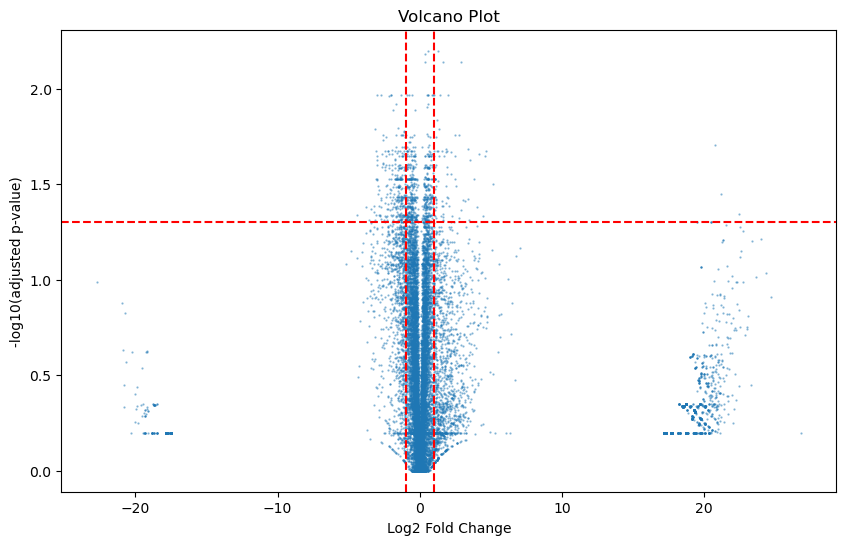

In [65]:
deg_df['significant'] = (deg_df['pvals_adj'] < 0.05) & (abs(deg_df['logfoldchanges'] > 1) & (deg_df['scores'] > 0))
# Can also add new column for significant DEGs, instead of getting new gane list

import numpy as np
import matplotlib.pyplot as plt

# Plot simple volcano plot
plt.figure(figsize=(10, 6))
plt.scatter(deg_df['logfoldchanges'], 
           -np.log10(deg_df['pvals_adj']),
           alpha=0.5,s=0.35)

# 3 lines, lfc = -1 and 1, adj_pval = 0.05
plt.axhline(-np.log10(0.05), color='red', linestyle='--')
plt.axvline(-1, color='red', linestyle='--',label='log2FC=1')
plt.axvline(1, color='red', linestyle='--',label='log2FC=-1')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(adjusted p-value)')
plt.title('Volcano Plot')

print("\nDEG Analysis Summary:")
print(f"Total genes analyzed: {len(deg_df)}")
print(f"Significant DEGs: {sum(deg_df['significant'])}")